In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [3]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
yo = pd.read_csv('iris2.txt')
# Importing the dataset

In [5]:
yo.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
yo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#**Understanding the data**

This is relatively a very small data set with 150 samples. Since the dataframe has four features (Sepal length, sepal width, petal length and petal width) with 150 samples belonging to either of the three target classes, our matrix will be:

Now going into the mathematics of the dataset, let us find out the standard deviation, mean, minimum value and the four quartile percentile of the data.

In [7]:
yo.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
yo.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
yo['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [40]:
yo.drop('sepal_length',axis=1,inplace=True)

# **Analysing the data visually**

To understand how each feature accounts for classification of the data, we can build a scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

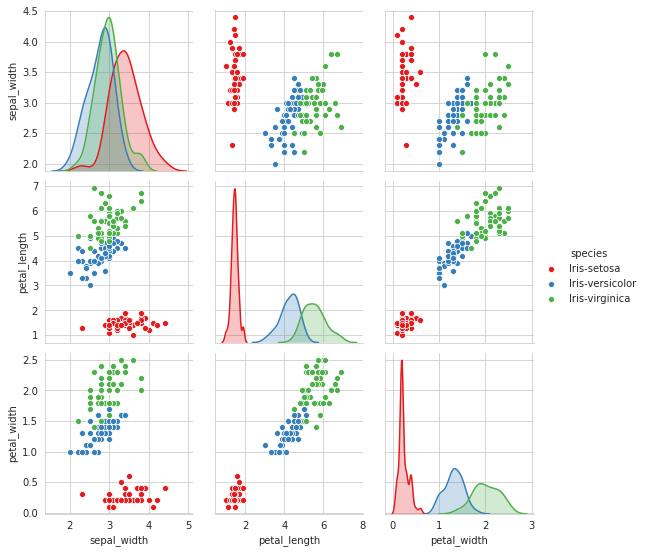

In [42]:
sns.pairplot(yo, hue='species',palette='Set1')

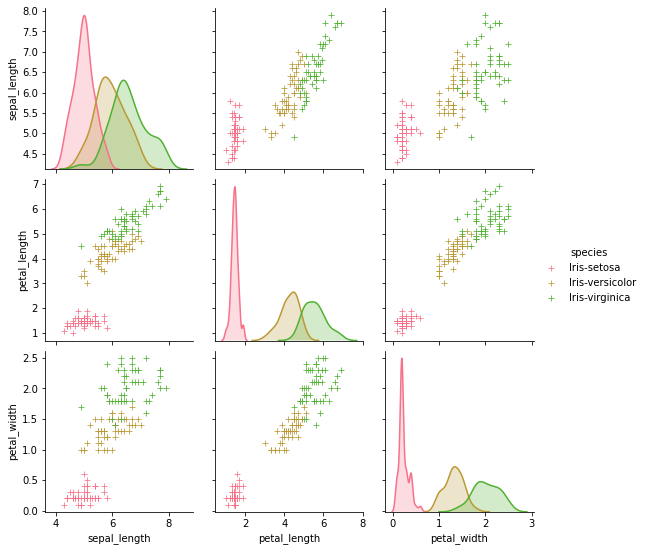

In [10]:
tmp = yo.drop('sepal_width', axis=1)
g = sns.pairplot(tmp, hue='species', markers='+')
plt.show()

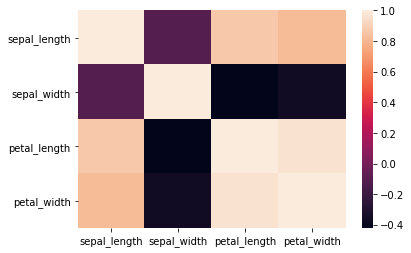

In [11]:
sns.heatmap(yo.corr())

Heatmap plots rectangular data as a color-encoded matrix.

In [12]:
sns.set_style('whitegrid')

used to set the aesthetic style of the plots.

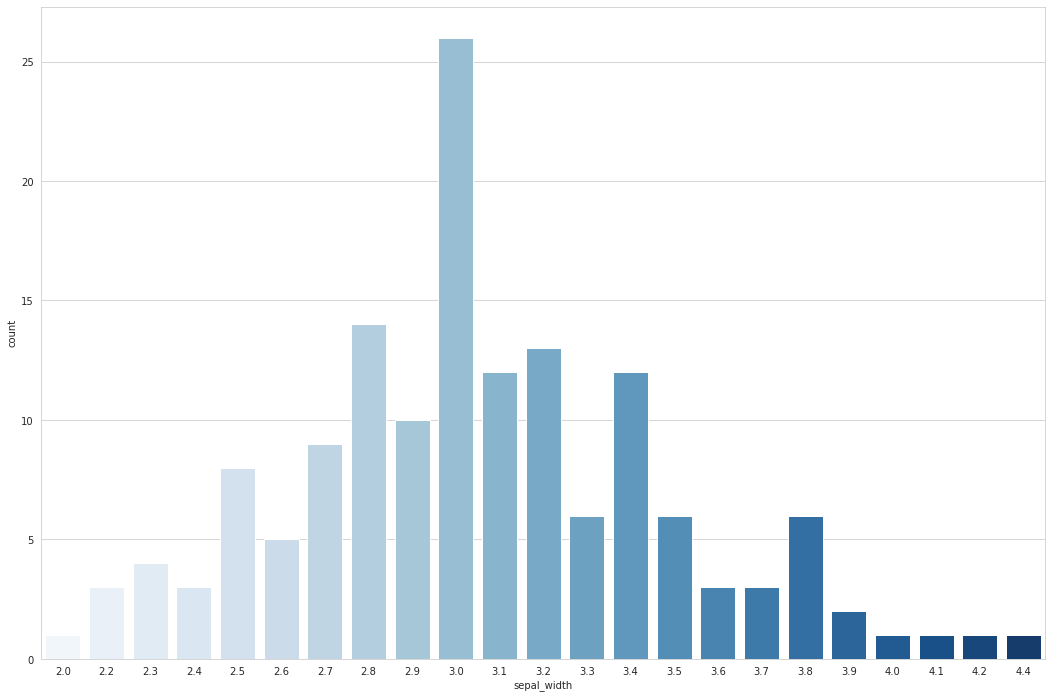

In [13]:
 plt.figure(figsize=(18,12)) 
sns.countplot(x='sepal_width', data=yo, palette='Blues')

It shows the counts of observations present in each categorical bin using bars.

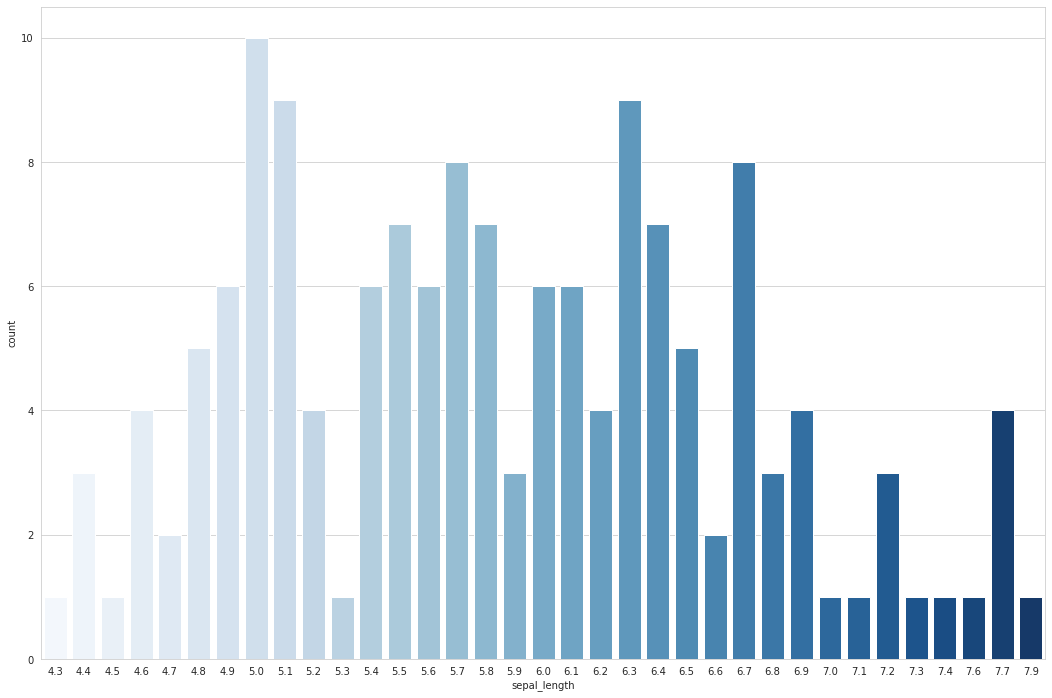

In [14]:
 plt.figure(figsize=(18,12)) 
sns.countplot(x='sepal_length', data=yo, palette='Blues')

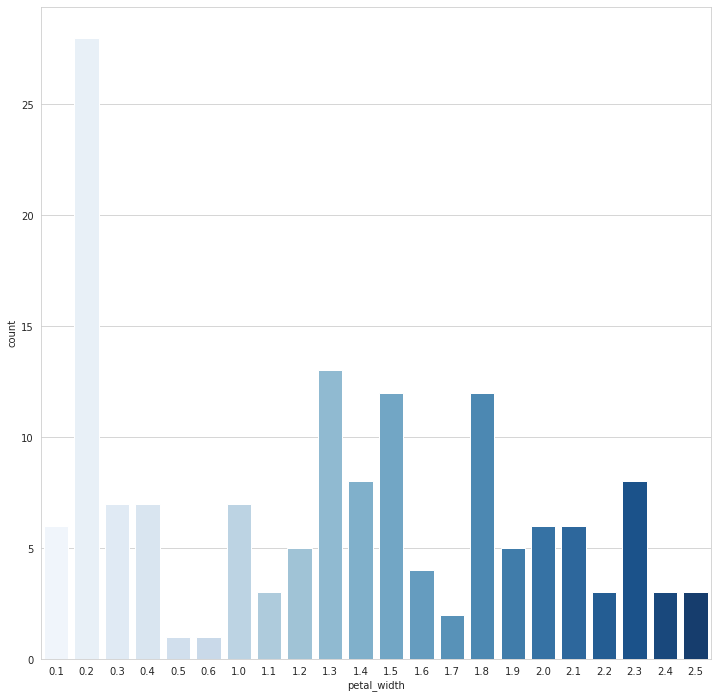

In [15]:
 plt.figure(figsize=(12,12)) 
sns.countplot(x='petal_width', data=yo, palette='Blues' )

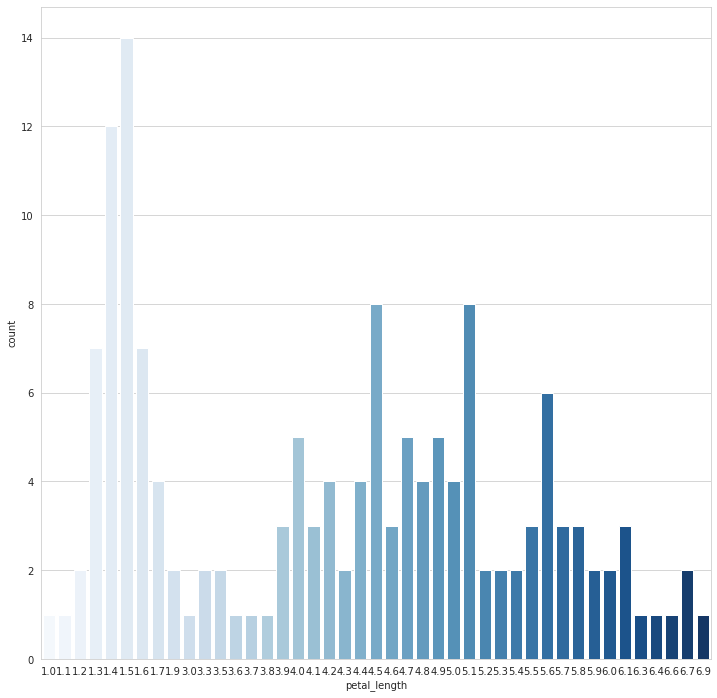

In [16]:
 plt.figure(figsize=(12,12)) 
sns.countplot(x='petal_length', data=yo, palette='Blues' )

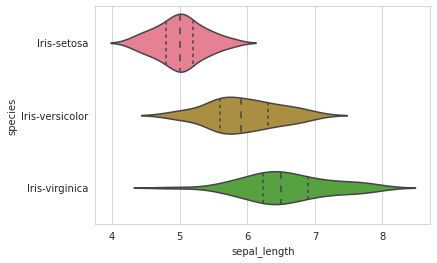

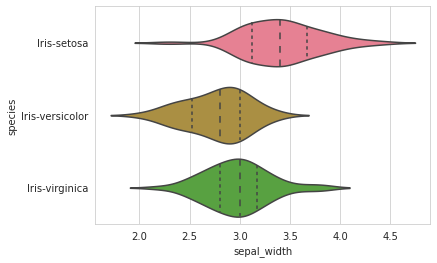

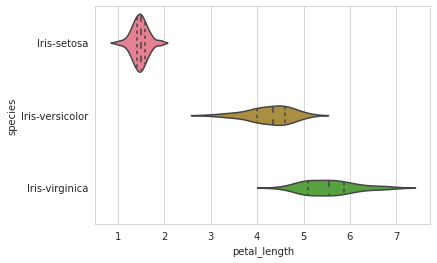

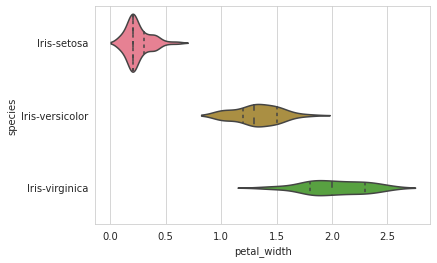

In [17]:
g = sns.violinplot(y='species', x='sepal_length', data=yo, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=yo, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=yo, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=yo, inner='quartile')
plt.show()

In [18]:
X = yo.drop(['petal_length', 'species'], axis=1)
y =yo['species']
print(X.shape)
print(y.shape)

(150, 3)
(150,)


# **KNN (K-Nearest Neighbors)**

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. 

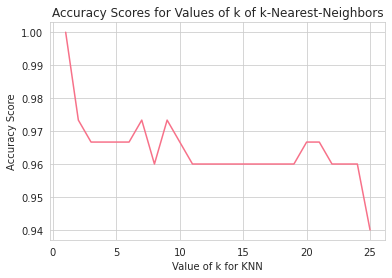

In [19]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [20]:
iris=datasets.load_iris()

In [21]:
H=np.array(iris.data)
H_cov=np.cov(H, rowvar=False)

In [22]:
iris_covmat=pd.DataFrame(data=H_cov,columns=iris.feature_names)
iris_covmat.index=iris.feature_names
iris_covmat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [23]:
print(H)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

printing the covariance matrix

In [24]:
print(iris_covmat)

                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           0.685694  ...          0.516271
sepal width (cm)           -0.042434  ...         -0.121639
petal length (cm)           1.274315  ...          1.295609
petal width (cm)            0.516271  ...          0.581006

[4 rows x 4 columns]


In [25]:
eigen_values,eigen_vectors=np.linalg.eig(H_cov)

In [26]:
eigen_vectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [27]:
eigen_values

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [28]:
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i])for i in range (len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
print("Eigen values arranged in descending order->")
for i in eigen_pairs:
  print(i[0])

Eigen values arranged in descending order->
4.228241706034864
0.24267074792863386
0.07820950004291899
0.02383509297345008


The eigen vectors with the lowest eigen values holds least information regarding the distribution of the data. On ranking the eigen values from highest to lowest in order to choose the top k eigen vectors.

In [29]:
featurevector=eigen_vectors[:,:2]
#Prints feature vector.
featurevector

#A feature vector is a vector containing multiple elements about an object. 

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [34]:
featurevector_t=np.transpose(featurevector)
H_t=np.transpose(H)
#Here H is the original dataset.

In [36]:
new_dataset_t=np.matmul(featurevector_t, H_t)
new_dataset=np.transpose(new_dataset_t)

In [37]:
new_dataset.shape
#Returns the shape of the dataset.

(150, 2)

This is the shape of the newly reduced 2D dataset.

In [30]:
yo.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [31]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))
#Calculating model accuracy:

0.9666666666666667


Accuracy of our model using KNN technique is equal to:96.67%.